In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.11, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'phate>=1.0' distribution was not found and is required by the application


In [2]:
adata = sc.read("/home/lugli/spuccio/Projects/SP039/GBmap/Lee2021_Part1.h5ad")
adata

AnnData object with n_obs × n_vars = 140247 × 26355
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'hvg', 'schema_version', 'title'
    obsm: 'X_umap'

In [3]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [4]:
%%time
adata=ov.pp.qc(adata,
              tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250},
               doublets_method='sccomposite',
              batch_key=None)
adata

CPU mode activated
Calculate QC metrics
End calculation of QC metrics.
Original cell number: 140247
!!!It should be noted that the `sccomposite` will remove more cells than             `scrublet`!!!
Begin of post doublets removal and QC plot using `sccomposite`
Cuda is not available; Fitting the COMPOSITE model on RNA modality
The RNA modality goodness-of-fit score is less than 3;         The model may not fit the data well
The RNA modality goodness-of-fit score is: 2.83616402846365 
<3: poor fit 
3~5: moderate fit 
>5: good fit
Cells retained after sccomposite: 114658, 25589 removed.
End of post sccomposite removal and QC plots.
Filters application (seurat or mads)
Lower treshold, nUMIs: 500; filtered-out-cells:         51
Lower treshold, n genes: 250; filtered-out-cells:         31149
Lower treshold, mito %: 0.2; filtered-out-cells:         0
Filters applicated.
Total cell filtered out with this last --mode seurat QC (and its     chosen options): 31166
Cells retained after scrublet a

AnnData object with n_obs × n_vars = 83492 × 16173
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'n_cells'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'hvg', 'schema_version', 'title'
    obsm: 'X_umap'

In [5]:
%%time
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,
                       target_sum=50*1e4)
adata

Begin robust gene identification
After filtration, 16173/16173 genes are kept.     Among 16173 genes, 15306 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 12.349775791168213 seconds.
End of size normalization: shiftlog and HVGs selection pearson
CPU times: user 29.5 s, sys: 4.52 s, total: 34 s
Wall time: 16 s


AnnData object with n_obs × n_vars = 83492 × 15306
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'hvg', 'schema_version', 'title', 'log1p'
    obsm: 'X_umap'
    layers: 'counts'

In [6]:
X_counts_recovered, size_factors_sub=ov.pp.recover_counts(adata.X, 50*1e4, 50*1e5, log_base=None, 
                                                          chunk_size=10000)
adata.layers['recover_counts']=X_counts_recovered

100%|██████████| 3492/3492 [00:03<00:00, 904.75it/s]


In [7]:
%%time
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
adata

CPU times: user 219 ms, sys: 184 ms, total: 403 ms
Wall time: 401 ms


View of AnnData object with n_obs × n_vars = 83492 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'hvg', 'schema_version', 'title', 'log1p'
    obsm: 'X_umap'
    layers: 'counts', 'recover_counts'

In [8]:
%%time
ov.pp.scale(adata)
adata

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
CPU times: user 4.14 s, sys: 987 ms, total: 5.12 s
Wall time: 4.63 s


AnnData object with n_obs × n_vars = 83492 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'hvg', 'schema_version', 'title', 'log1p'
    obsm: 'X_umap'
    layers: 'counts', 'recover_counts', 'scaled'

In [9]:
%%time
ov.pp.pca(adata,layer='scaled',n_pcs=50)
adata

computing PCA
    with n_comps=50
    finished (0:00:12)
CPU times: user 1min 18s, sys: 3min 39s, total: 4min 57s
Wall time: 12.6 s


AnnData object with n_obs × n_vars = 83492 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'hvg', 'schema_version', 'title', 'log1p', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'X_umap', 'X_pca', 'scaled|original|X_pca'
    varm: 'PCs', 'scaled|original|pca_loadings'
  

In [10]:
%%time
ov.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)
CPU times: user 31 s, sys: 537 ms, total: 31.5 s
Wall time: 30.4 s


In [11]:
%%time
ov.pp.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:14)
CPU times: user 2min 7s, sys: 1min 21s, total: 3min 29s
Wall time: 1min 14s


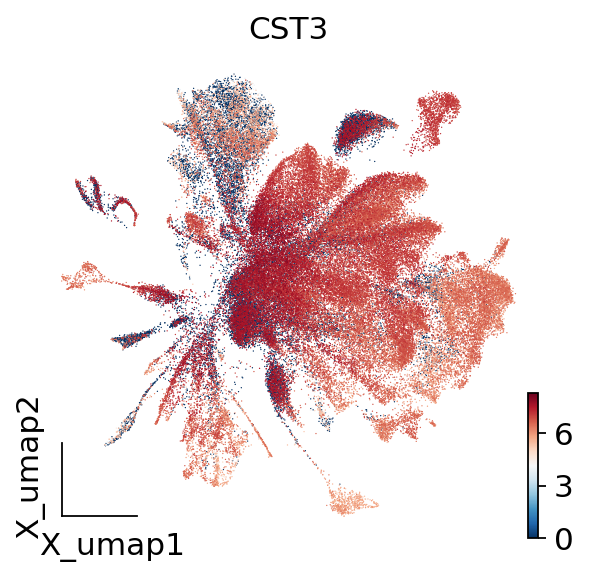

In [12]:
ov.pl.embedding(adata,
                basis='X_umap',
                color='CST3',
                frameon='small')

In [13]:
adata_raw=adata.raw.to_adata()
ov.pp.score_genes_cell_cycle(adata_raw,species='human')

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    644 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    814 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


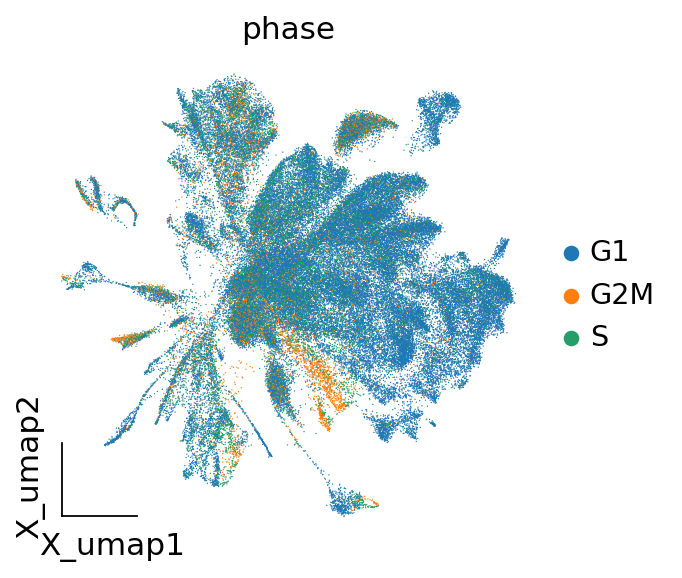

In [14]:
ov.pl.embedding(adata_raw,
                basis='X_umap',
                color='phase',
                frameon='small')

In [15]:
ov.pp.leiden(adata,resolution=1)

running Leiden clustering
    finished: found 36 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:25)


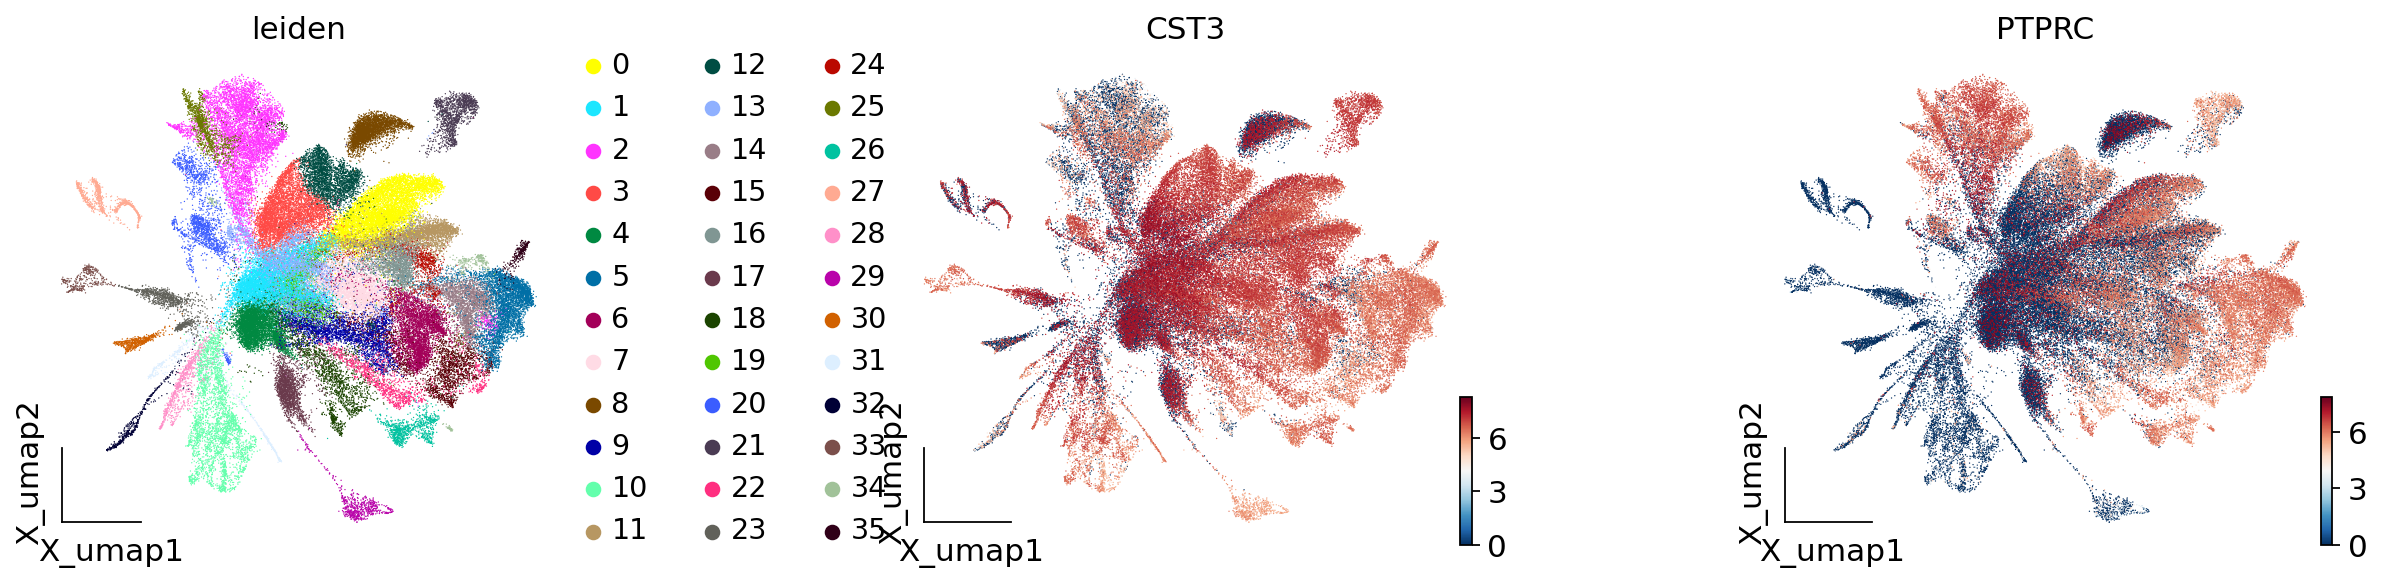

In [16]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'CST3', 'PTPRC'],
                frameon='small',wspace=0.5)

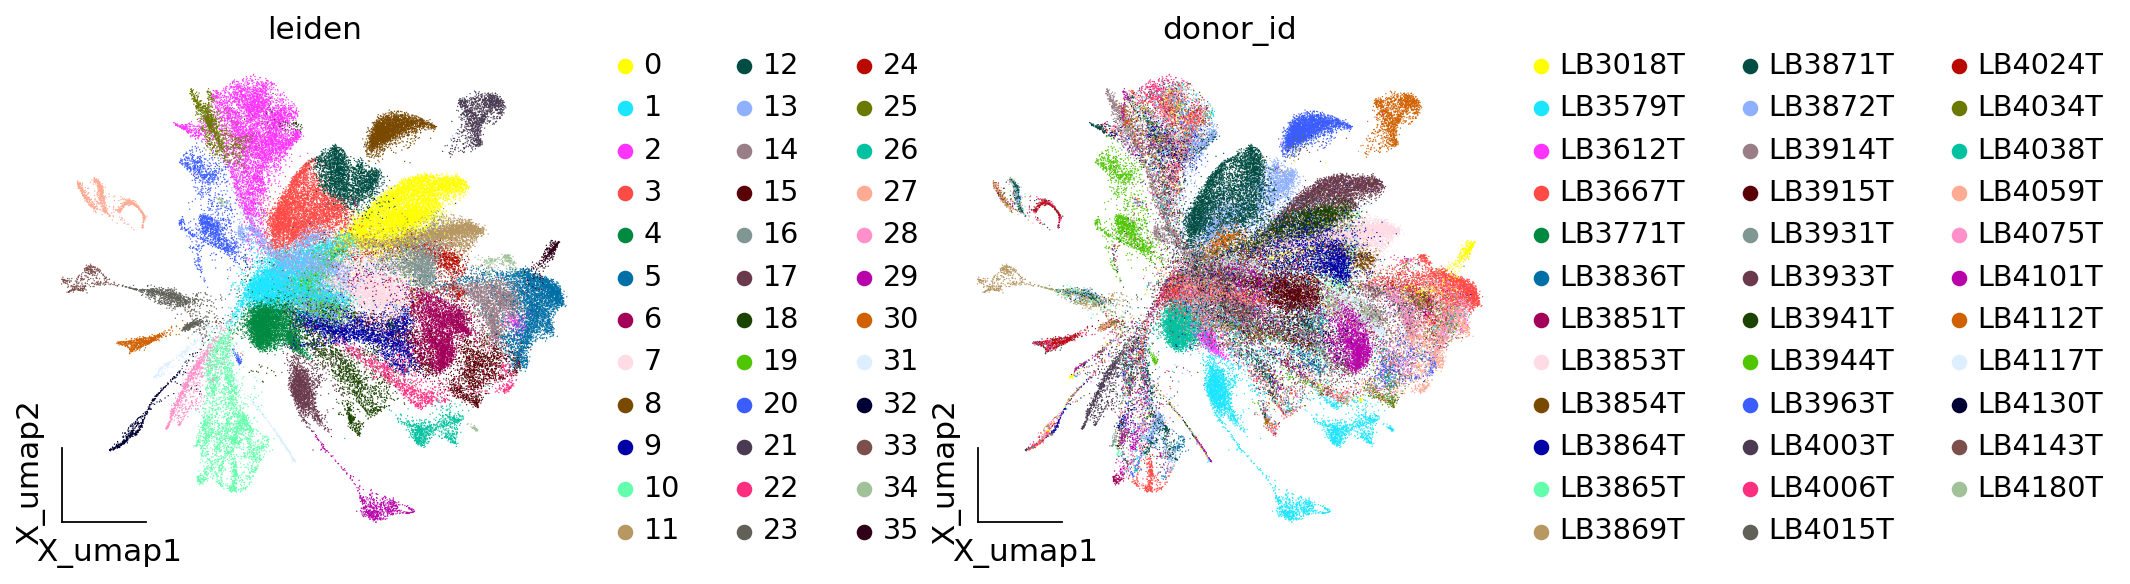

In [17]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [18]:
adata.write("/home/lugli/spuccio/Projects/SP039/GBmap/Lee2021_Part1.h5ad")

In [19]:
adata

AnnData object with n_obs × n_vars = 83492 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'hvg', 'schema_version', 'title', 'log1p', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'donor_id_colors'
    obsm: 'X_umap', 'X_pca